## 1. Predicción del precio de una Casa

En esta sección trabajaremos con un pequeño dataset conocido como **Boston Housing** que nos permitirá experimentar de modo más completo y exhaustivo con las técnicas bajo estudio. El problema consiste en predecir el precio de una casa en una zona/barrio de Boston (*USA*) a partir de una serie de atributos que describen el lugar que éste se ubica: tasa de criminalidad, proporción de zona residencial, proporción de zona industrial, si se encuentra junto al rı́o ó no, contaminación atmosférica medida como la concentración de óxidos nı́tricos en el aire, entre otros. Para ver en detalle la descripción de la semántica asociada a los atributos de este problema, puede consultar   __[Housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)__.

> a) Construya un *dataframe* con los datos a analizar descargando los datos desde la URL mantenida por los autores de *The Elements of Statistical Learning*. Convierta la variable *CHAS* a un vector binario de dos componentes indicando las 2 posibilidades de su valor, indique la conveniencia de este paso. Describa brevemente el dataset utilizar.

In [39]:
import pandas as pd
from sklearn.cross_validation import train_test_split

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical


df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.347826,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.083004,356.674032,12.653063,22.532806,0.930830,0.069170
std,8.601545,23.310593,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.280574,91.294864,7.141062,9.197104,0.253994,0.253994
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.000000,0.320000,1.730000,5.000000,0.000000,0.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.000000,375.377500,6.950000,17.025000,1.000000,0.000000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000,1.000000,0.000000
75%,3.677082,12.000000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.000000,396.225000,16.955000,25.000000,1.000000,0.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000,1.000000


In [13]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18,2.31,0.538,6.575,65.2,4.0900,1,296,15,396.90,4.98,24.0,1,0
1,0.02731,0,7.07,0.469,6.421,78.9,4.9671,2,242,17,396.90,9.14,21.6,1,0
2,0.02729,0,7.07,0.469,7.185,61.1,4.9671,2,242,17,392.83,4.03,34.7,1,0
3,0.03237,0,2.18,0.458,6.998,45.8,6.0622,3,222,18,394.63,2.94,33.4,1,0
4,0.06905,0,2.18,0.458,7.147,54.2,6.0622,3,222,18,396.90,5.33,36.2,1,0


Como se puede apreciar:
        1. El dataset cuenta con 506 entradas y 15 atributos
        2. CHAS_1          Si esta en la proximidad del rio Charles.
        2. CHAS_0          No esta en la proximidad del rio Charles.
        3. CRIM            Ratio de crimen percapita del pueblo.
        4. ZN              Proporcion de area residencial cuyos lotes superan los 25,000 sq.ft.
        5. INDUS           Prporcion de los negocios que no son retail a lo largo del pueblo.
        5. NOX             Concentración de oxido nitrico(1 parte sobre 10 millones).
        6. RM              Número promedio de habitaciones por vivienda.
        7. AGE             Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
        8. DIS             Distancias ponderadas a cinco centros de empleo de Boston.
        9. RAD             Índice de accesibilidad a las autopistas radiales.
        10. TAX            Tasa de impuesto a las propiedad a valor completo por 10,000.
        11. PTRATIO        Relación alumnos/profesor por ciudad.
        12. B              Ecuación 1000(Bk - 0.63)^2 donde Bk es la proporción de personas negras en el pueblo.
        13. LSTAT          Porcentaje más bajo de la población.
        14. MEDV           Valor medio de las viviendas ocupadas por sus propietarios en 100 dolares.
        
El dataset no contienen entradas con atirbutos vacios 

A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in your study. In research design, a dummy variable is often used to distinguish different treatment groups. In the simplest case, we would use a 0,1 dummy variable where a person is given a value of 0 if they are in the control group or a 1 if they are in the treated group. Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. This means that we don't need to write out separate equation models for each subgroup. The dummy variables act like 'switches' that turn various parameters on and off in an equation. Another advantage of a 0,1 dummy-coded variable is that even though it is a nominal-level variable you can treat it statistically like an interval-level variable (if this made no sense to you, you probably should refresh your memory on levels of measurement). For instance, if you take an average of a 0,1 variable, the result is the proportion of 1s in the distribution.

>b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 200 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 300 epochs de entrenamiento, en el conjunto de entrenamiento y de pruebas. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

In [40]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical

df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
scaler = StandardScaler().fit(df_train)

X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)

y_train = df_train.pop('MEDV').reshape(-1,1)
y_test = df_test.pop('MEDV').reshape(-1,1)





C:\Users\Teikkenn\AppData\Local\conda\conda\envs\ann\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\Teikkenn\AppData\Local\conda\conda\envs\ann\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [48]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
hist = model.fit(np.asmatrix(X_train_scaled), np.asmatrix(y_train), epochs=300,verbose=0, validation_data=(np.asmatrix(X_test_scaled), np.asmatrix(y_test)))


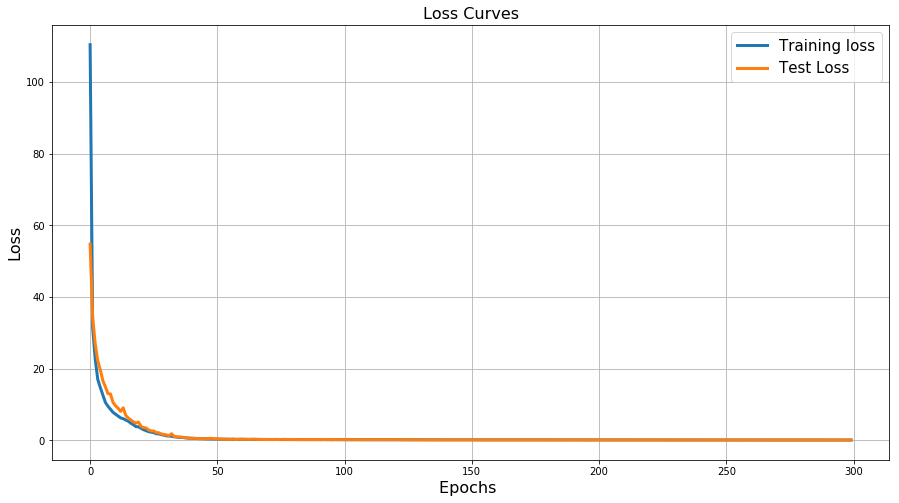

379/379 [==============================] - 0s 49us/step


0.0829929417702013

In [61]:
# Loss Curves

plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['loss'],linewidth=3.0)
plt.plot(hist.history['val_loss'],linewidth=3.0)
plt.legend(['Training loss', 'Test Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
#plt.figure(figsize=[8,6])
#plt.plot(history.history['acc'],'r',linewidth=3.0)
#plt.plot(history.history['val_acc'],'b',linewidth=3.0)
#plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
#plt.xlabel('Epochs ',fontsize=16)
#plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(np.asmatrix(X_train_scaled),np.asmatrix(y_train))